In [3]:
from myPackage.my_module import *


## Data generation

In [5]:
pio4 = density_matrix(rho2(pi/4,1))
N=10000
bins = pio4.bins()['bins']
columns={'Angle':np.zeros(N), 'Visibility': np.zeros(N)}
for i in range(100):
    columns['[' + str(round(bins[i],2)) + ', ' + str(round(bins[i+1],2)) + ']'] = np.zeros(N)

df = pd.DataFrame(columns)
for i in range(N):
    vis = np.random.random()
    th = np.random.random()*pi/4
    den = density_matrix(rho2(th, vis))
    df['Angle'].iloc[i] = th
    df['Visibility'].iloc[i] = vis
    loc_bins = den.bins()['counts']
    for j, bin in enumerate(loc_bins):
        df[df.columns[j+2]].iloc[i] = bin
    if(i%100==0):
        print(f'{i}/{N} completed')    

0/10000 completed
100/10000 completed
200/10000 completed
300/10000 completed
400/10000 completed
500/10000 completed
600/10000 completed
700/10000 completed
800/10000 completed
900/10000 completed
1000/10000 completed
1100/10000 completed
1200/10000 completed
1300/10000 completed
1400/10000 completed
1500/10000 completed
1600/10000 completed
1700/10000 completed
1800/10000 completed
1900/10000 completed
2000/10000 completed
2100/10000 completed
2200/10000 completed
2300/10000 completed
2400/10000 completed
2500/10000 completed
2600/10000 completed
2700/10000 completed
2800/10000 completed
2900/10000 completed
3000/10000 completed
3100/10000 completed
3200/10000 completed
3300/10000 completed
3400/10000 completed
3500/10000 completed
3600/10000 completed
3700/10000 completed
3800/10000 completed
3900/10000 completed
4000/10000 completed
4100/10000 completed
4200/10000 completed
4300/10000 completed
4400/10000 completed
4500/10000 completed
4600/10000 completed
4700/10000 completed
4800

In [6]:
df.to_csv('werner_sample.csv')

In [4]:
df = pd.read_csv('werner_sample.csv', index_col='Unnamed: 0')
df.head()

,Angle,Visibility,"[0.0, 0.01]","[0.01, 0.02]","[0.02, 0.03]","[0.03, 0.04]","[0.04, 0.05]","[0.05, 0.06]","[0.06, 0.07]","[0.07, 0.08]",...,"[0.9, 0.91]","[0.91, 0.92]","[0.92, 0.93]","[0.93, 0.94]","[0.94, 0.95]","[0.95, 0.96]","[0.96, 0.97]","[0.97, 0.98]","[0.98, 0.99]","[0.99, 1.0]"
0,0.333026,0.045424,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.568860,0.448408,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.620751,0.267946,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.127500,0.635826,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.401182,0.933977,0.0,0.00898,0.02606,0.02698,0.02618,0.02702,0.02636,0.0261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import tensorflow as tf
target = tf.constant(df[['Angle', 'Visibility']])
features = tf.constant(df[df.columns[2:]])

## First model

In [6]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, Input
def model_ang_vis():
    input = Input(shape=(100,))
    hid1 = Dense(95, activation='sigmoid')(input)
    hid2 = Dense(95, activation='sigmoid')(hid1)
    out = Dense(2, activation='sigmoid')(hid2)
    return Model(input, out)
model = model_ang_vis()
model.compile('Adam', loss='mse')

In [7]:
model.fit(features, target, validation_split = 0.2, epochs=50)

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.0623 - val_loss: 0.0455
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0337 - val_loss: 0.0274
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0278 - val_loss: 0.0262
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0267 - val_loss: 0.0255
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0253 - val_loss: 0.0242
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0234 - val_loss: 0.0211
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0194 - val_loss: 0.0161
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0138 - val_loss: 0.0103
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0070
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0066 - val_loss: 0.0070

### First model evaluation

In [49]:
outliers = []
diff = (model.predict(features) - target).numpy()
res = np.sum(np.abs(diff), axis=1)
res = pd.Series(res)
diff = pd.DataFrame({'Diff_angle': diff[:,0], 'Diff_visibility': diff[:,1]})
selection = np.logical_and(res.values > 0.08, res.values < 0.12)
selected_diff = diff.loc[selection]
high = np.quantile(res.values,0.75)
low = np.quantile(res.values, 0.25)
iqr = high - low
for i, val in enumerate(res.values):
    if val> high + 1.5*iqr:
        outliers.append(i)

outliers

313/313 [==============================] - 0s 1ms/step


[392, 2294, 3000, 6913, 9565, 9589]

In [22]:
model.predict(features[392:393])

1/1 [==============================] - 0s 49ms/step


array([[0.19339, 0.23232]], dtype=float32)

In [23]:
target[392]

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.00119, 0.21485])>

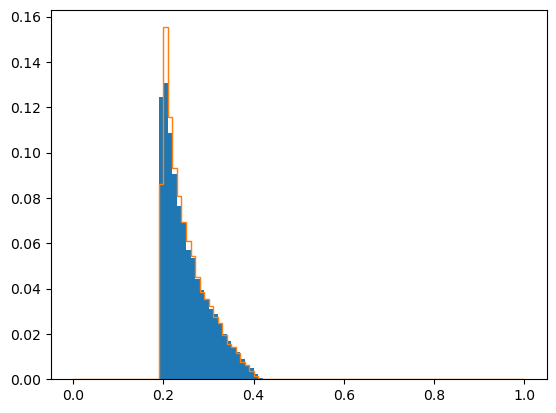

In [24]:
double_plot(density_matrix(rho2(0.19339, 0.23232)),density_matrix(rho2(0.00119, 0.21485)))

(array([ 322., 1112., 1233.,  987.,  845.,  628.,  626.,  553.,  737.,
         929.,  803.,  347.,  218.,  149.,  129.,  113.,  120.,   79.,
          53.,   17.]),
 array([0.00066, 0.01135, 0.02203, 0.03272, 0.0434 , 0.05409, 0.06477,
        0.07545, 0.08614, 0.09682, 0.10751, 0.11819, 0.12888, 0.13956,
        0.15025, 0.16093, 0.17162, 0.1823 , 0.19299, 0.20367, 0.21436]),
 <BarContainer object of 20 artists>)

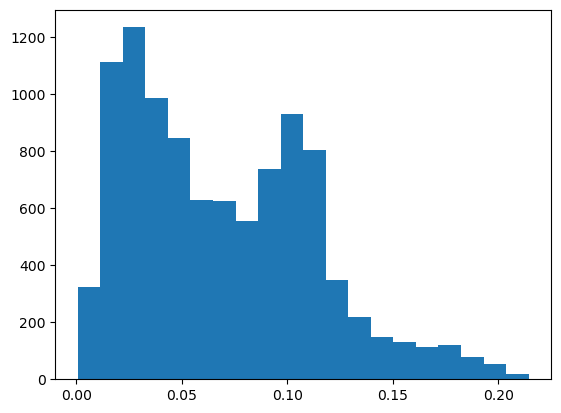

In [37]:
plt.hist(res, bins=20)

array([[<Axes: title={'center': 'Diff_angle'}>,
        <Axes: title={'center': 'Diff_visibility'}>]], dtype=object)

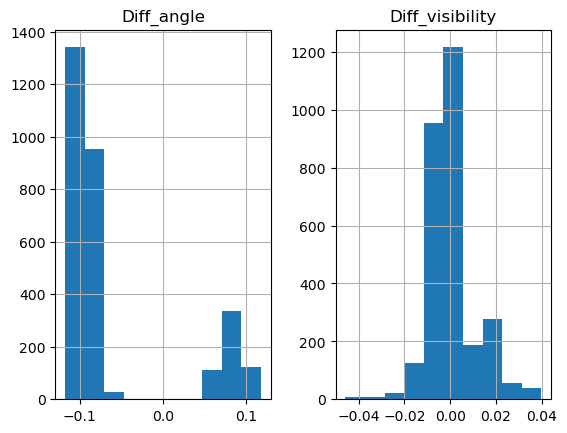

In [39]:
selected_diff.hist()

In [44]:
for x in target[120:124].numpy():
    print(x)

[0.09515 0.66304]
[0.59575 0.02653]
[0.63766 0.68764]
[0.32356 0.96751]


<Axes: xlabel='Diff_visibility', ylabel='Diff_angle'>

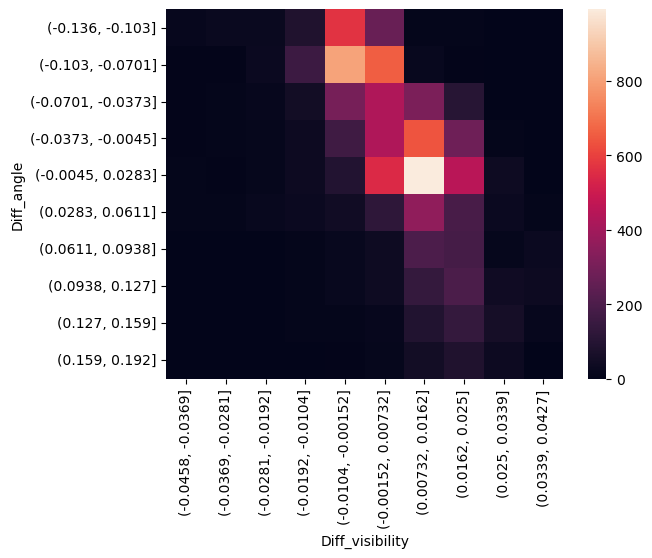

In [46]:
sns.heatmap(pd.crosstab(index=pd.cut(diff['Diff_angle'], 10), columns=pd.cut(diff['Diff_visibility'], 10)))

<Axes: xlabel='Diff_visibility', ylabel='Diff_angle'>

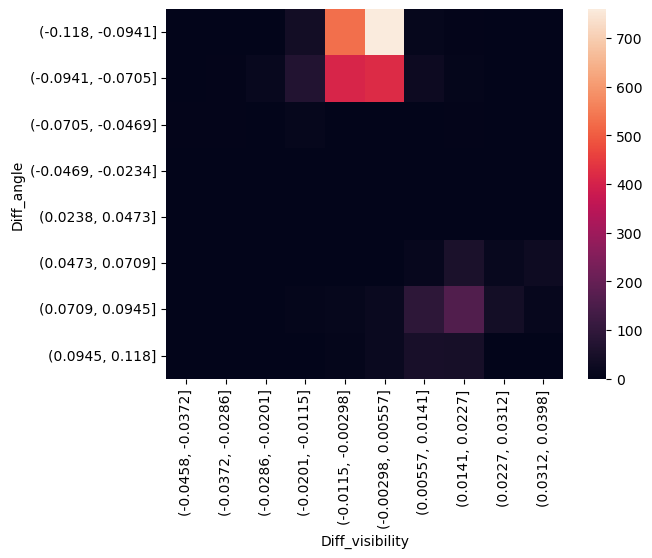

In [47]:
sns.heatmap(pd.crosstab(index=pd.cut(selected_diff['Diff_angle'], 10), columns=pd.cut(selected_diff['Diff_visibility'], 10)))

In [50]:
target_df = df[['Angle', 'Visibility']]
target_df.loc[np.logical_and(res.values > 0.08, res.values < 0.12)]

,Angle,Visibility
0,0.333026,0.045424
4,0.401182,0.933977
9,0.427248,0.961864
13,0.458526,0.500725
19,0.367713,0.008877
...,...,...
9980,0.108705,0.591501
9981,0.313705,0.892598
9983,0.280615,0.895911
9986,0.432219,0.019302


<Axes: xlabel='Visibility', ylabel='Angle'>

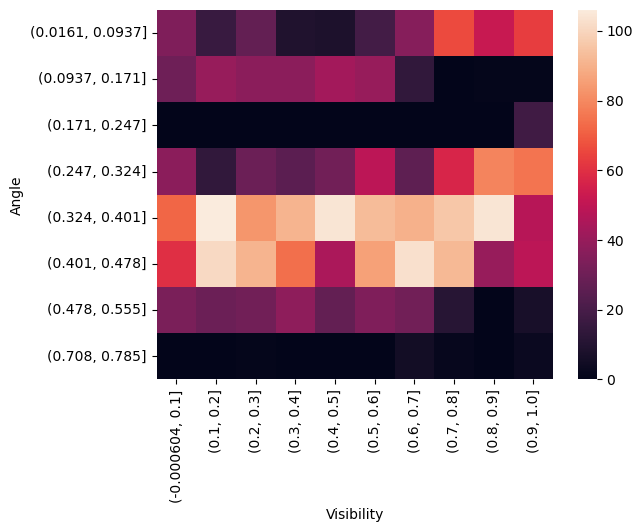

In [51]:
sns.heatmap(pd.crosstab(index=pd.cut(target_df['Angle'].loc[selection], 10), columns=pd.cut(target_df['Visibility'].loc[selection], 10)))

<Axes: xlabel='Visibility', ylabel='Angle'>

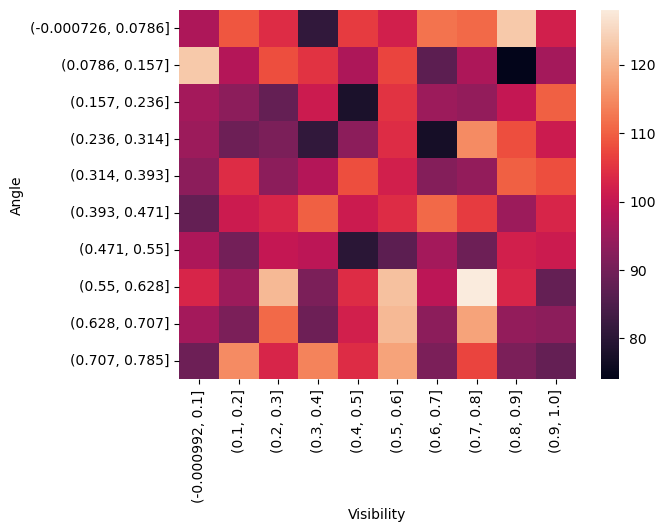

In [52]:
sns.heatmap(pd.crosstab(index=pd.cut(target_df['Angle'], 10), columns=pd.cut(target_df['Visibility'], 10)))

## Second model

In [34]:


def fid_loss(y_true, y_pred):
    y_true_np = np.array([el.numpy() for el in tf.unstack(y_true)])
    y_pred_np = np.array([el.numpy() for el in tf.unstack(y_pred)])
    y_true_ang = y_true_np[:,0]
    y_true_vis = y_true_np[:,1]
    y_pred_ang = y_pred_np[:,0]
    y_pred_vis = y_pred_np[:,1]
    
    coss = np.cos(y_true_ang - y_pred_ang)
    
    anti_fid = tf.constant(1 - (y_true_vis*y_pred_vis*(coss*coss - 0.25) + 0.25))
    loss = tf.reduce_mean(tf.square(anti_fid))
    
    return loss
     

In [48]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, Input
def model_ang_vis():
    input = Input(shape=(100,))
    hid1 = Dense(95, activation='sigmoid')(input)
    hid2 = Dense(95, activation='sigmoid')(hid1)
    out = Dense(2, activation='sigmoid')(hid2)
    return Model(input, out)
model2 = model_ang_vis()
model2.compile('Adam', loss=fid_loss, run_eagerly=True)

In [49]:
model2.fit(features, target, validation_split = 0.2, epochs=50)

Epoch 1/50


ValueError: No gradients provided for any variable: (['dense_3/kernel:0', 'dense_3/bias:0', 'dense_4/kernel:0', 'dense_4/bias:0', 'dense_5/kernel:0', 'dense_5/bias:0'],). Provided `grads_and_vars` is ((None, <tf.Variable 'dense_3/kernel:0' shape=(100, 95) dtype=float32, numpy=
array([[-0.09982, -0.11233, -0.12748, ..., -0.11176, -0.04851,  0.13257],
       [-0.0968 , -0.08774,  0.02443, ...,  0.07357,  0.15807, -0.14982],
       [-0.12891,  0.04491,  0.04765, ...,  0.01991,  0.14749, -0.09256],
       ...,
       [ 0.10404,  0.11393, -0.03652, ...,  0.00839, -0.02558, -0.03456],
       [-0.15566,  0.16516, -0.0146 , ..., -0.10637, -0.14308,  0.08126],
       [-0.11474, -0.16043,  0.00467, ...,  0.02057, -0.00454,  0.07423]],
      dtype=float32)>), (None, <tf.Variable 'dense_3/bias:0' shape=(95,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>), (None, <tf.Variable 'dense_4/kernel:0' shape=(95, 95) dtype=float32, numpy=
array([[ 0.09698, -0.11673, -0.00731, ...,  0.15998, -0.16456, -0.16066],
       [ 0.15164,  0.00006,  0.06375, ..., -0.11412,  0.06451,  0.05492],
       [ 0.09524, -0.17147,  0.07114, ...,  0.12812, -0.00881,  0.01224],
       ...,
       [ 0.15297, -0.0469 ,  0.17266, ...,  0.16245, -0.14617,  0.01523],
       [ 0.12696,  0.09164,  0.12838, ..., -0.02284,  0.1674 , -0.14915],
       [-0.07176, -0.02515,  0.06385, ...,  0.0013 ,  0.00577,  0.08281]],
      dtype=float32)>), (None, <tf.Variable 'dense_4/bias:0' shape=(95,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>), (None, <tf.Variable 'dense_5/kernel:0' shape=(95, 2) dtype=float32, numpy=
array([[ 0.18142, -0.20881],
       [ 0.20165, -0.04191],
       [-0.15219, -0.15157],
       [ 0.02678, -0.05628],
       [-0.06205, -0.05009],
       [-0.109  ,  0.23199],
       [ 0.11828, -0.14682],
       [-0.10553, -0.23442],
       [ 0.08867, -0.06179],
       [-0.08271,  0.0949 ],
       [-0.03909, -0.04177],
       [ 0.13525,  0.18806],
       [ 0.1138 , -0.14329],
       [ 0.10745,  0.11549],
       [-0.13807,  0.01831],
       [ 0.00461, -0.06581],
       [-0.15899,  0.02149],
       [ 0.07021, -0.07635],
       [-0.03226,  0.06019],
       [-0.03869,  0.15354],
       [-0.01386, -0.16084],
       [ 0.00591,  0.15195],
       [-0.04011,  0.05729],
       [ 0.0533 , -0.12994],
       [ 0.22762,  0.23516],
       [-0.15892,  0.00615],
       [-0.1154 , -0.02625],
       [ 0.17598,  0.06102],
       [-0.12561, -0.13543],
       [ 0.02   ,  0.11062],
       [-0.17459, -0.09599],
       [-0.19235, -0.05337],
       [ 0.16974, -0.1764 ],
       [ 0.06845, -0.18281],
       [-0.20241, -0.15712],
       [ 0.20925, -0.03146],
       [ 0.2353 , -0.00355],
       [ 0.09378,  0.14491],
       [-0.01982, -0.16312],
       [-0.14218, -0.08758],
       [ 0.05492,  0.04336],
       [ 0.1697 , -0.04898],
       [ 0.24258, -0.00678],
       [-0.12901,  0.02419],
       [ 0.2186 , -0.06707],
       [-0.00231, -0.23032],
       [ 0.23274, -0.21078],
       [ 0.19594, -0.13048],
       [-0.15191, -0.16324],
       [-0.16253, -0.17267],
       [-0.20253, -0.19747],
       [ 0.17639, -0.06932],
       [-0.22445, -0.14476],
       [-0.06582, -0.19027],
       [ 0.04605, -0.01987],
       [-0.09185,  0.03404],
       [-0.10262, -0.02729],
       [-0.1042 , -0.01679],
       [ 0.14207, -0.13956],
       [ 0.11353, -0.1435 ],
       [ 0.13314,  0.21249],
       [ 0.07085,  0.22546],
       [-0.21735, -0.18596],
       [-0.05041, -0.08121],
       [ 0.21427,  0.11143],
       [-0.23522,  0.10384],
       [-0.23403,  0.1139 ],
       [-0.12879, -0.10056],
       [ 0.14647,  0.09778],
       [-0.1953 , -0.13739],
       [-0.22127, -0.05723],
       [-0.19802, -0.03536],
       [-0.02768,  0.20187],
       [-0.00868, -0.19824],
       [ 0.16007,  0.11602],
       [-0.16095, -0.11365],
       [-0.12508,  0.0778 ],
       [-0.0015 , -0.18279],
       [ 0.07433, -0.24347],
       [-0.19985, -0.07198],
       [-0.17439,  0.10238],
       [ 0.09547,  0.20089],
       [-0.10346,  0.17279],
       [-0.01041,  0.0829 ],
       [ 0.00532, -0.2197 ],
       [ 0.03297, -0.1682 ],
       [-0.03504,  0.08172],
       [-0.14448,  0.20434],
       [ 0.04753,  0.1251 ],
       [ 0.08078,  0.19602],
       [-0.2267 ,  0.21748],
       [ 0.16129,  0.1623 ],
       [ 0.10693,  0.02794],
       [ 0.16615,  0.08008],
       [-0.14546,  0.1402 ]], dtype=float32)>), (None, <tf.Variable 'dense_5/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>)).